In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [2]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chem_link, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chem_link * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chem_link * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [3]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.056
electrical_link = 0.01

u0 = SA[-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
p = [a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-2.5, 0.0, 0.0, -1.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.056, 0.01]

In [17]:
# Инициализация интервала параметра
start_chem= 0.056 # 0.000 # Стартовое значение параметра
finish_chem = 0.0 # Конечное значение параметра
len_chem = 1000 #  Длина интервала параметра
range_chem = range(start_chem, finish_chem, length = len_chem  ) # Интервал параметра

number_transient_points = 10000.0 # Время в течении которого эволюционирует траектория, перед сохранением точек
number_save_points = 1000.0 # Время в течении которого сохраняются точки

idx_control_p = 10 # Индекс управляющего параметра

tstep = 0.01 # Шаг по времени для интегратора
setting_integrate = (alg = Vern9(), adaptive = false, dt = tstep); # Настройки интегратора

# Сечение Пуанкаре
idx_fix_var = 2 # Индекс фиксируемой переменной
val_fix = 0.0 # Значение фиксируемой переменной
surface = (idx_fix_var, val_fix) # Инициализация сечения Пуанкаре
setting_root = (xrtol = 1e-11, atol = 1e-11) # Настройки Для сечения Пуанкаре

(xrtol = 1.0e-11, atol = 1.0e-11)

In [ ]:
idx_save_var = 1 # Индекс сохраняемой переменной
x_1 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

parameter = 0.056
parameter = 0.05594394394394395
parameter = 0.055887887887887885
parameter = 0.05583183183183183
parameter = 0.05577577577577578
parameter = 0.05571971971971972
parameter = 0.05566366366366366
parameter = 0.055607607607607606
parameter = 0.05555155155155155
parameter = 0.0554954954954955
parameter = 0.055439439439439436
parameter = 0.05538338338338338
parameter = 0.05532732732732733
parameter = 0.05527127127127127
parameter = 0.05521521521521521
parameter = 0.05515915915915916
parameter = 0.0551031031031031
parameter = 0.05504704704704705
parameter = 0.054990990990990994
parameter = 0.05493493493493493
parameter = 0.05487887887887888
parameter = 0.054822822822822824
parameter = 0.05476676676676677
parameter = 0.05471071071071071
parameter = 0.054654654654654654
parameter = 0.0545985985985986
parameter = 0.054542542542542545
parameter = 0.054486486486486484
parameter = 0.05443043043043043
parameter = 0.054374374374374375
parameter = 0.05431831831831832
parameter = 0.05

parameter = 0.04176176176176176
parameter = 0.041705705705705705
parameter = 0.04164964964964965
parameter = 0.041593593593593596
parameter = 0.041537537537537535
parameter = 0.04148148148148148
parameter = 0.041425425425425426
parameter = 0.04136936936936937
parameter = 0.04131331331331331
parameter = 0.041257257257257256
parameter = 0.0412012012012012
parameter = 0.04114514514514515
parameter = 0.04108908908908909
parameter = 0.04103303303303303
parameter = 0.04097697697697698
parameter = 0.04092092092092092
parameter = 0.04086486486486487
parameter = 0.04080880880880881
parameter = 0.04075275275275275
parameter = 0.0406966966966967
parameter = 0.04064064064064064
parameter = 0.04058458458458458
parameter = 0.04052852852852853
parameter = 0.04047247247247247
parameter = 0.04041641641641642
parameter = 0.04036036036036036
parameter = 0.0403043043043043
parameter = 0.04024824824824825
parameter = 0.040192192192192194
parameter = 0.04013613613613613
parameter = 0.04008008008008008
param

parameter = 0.02757957957957958
parameter = 0.027523523523523524
parameter = 0.027467467467467466
parameter = 0.027411411411411412
parameter = 0.027355355355355354
parameter = 0.0272992992992993
parameter = 0.027243243243243242
parameter = 0.027187187187187187
parameter = 0.02713113113113113
parameter = 0.027075075075075075
parameter = 0.027019019019019017
parameter = 0.026962962962962963
parameter = 0.02690690690690691
parameter = 0.02685085085085085
parameter = 0.026794794794794796
parameter = 0.02673873873873874
parameter = 0.026682682682682684
parameter = 0.026626626626626626
parameter = 0.02657057057057057
parameter = 0.026514514514514514
parameter = 0.02645845845845846
parameter = 0.0264024024024024
parameter = 0.026346346346346347
parameter = 0.02629029029029029
parameter = 0.026234234234234235
parameter = 0.026178178178178177
parameter = 0.026122122122122123
parameter = 0.026066066066066065
parameter = 0.02601001001001001
parameter = 0.025953953953953952
parameter = 0.025897897

In [ ]:
idx_save_var = 4 # Индекс сохраняемой переменной
x_2 = produce_orbitdiagram(ds, surface, idx_save_var, idx_control_p, range_chem;
                              tfinal = number_save_points, Ttr = number_transient_points, printparams = true,
                              diffeq = setting_integrate, rootkw = setting_root
                              );

In [ ]:
x_sum = x_1 + x_2;

In [ ]:
lab_size = 25; tick_size = 15

#### Проверка на дебила

In [ ]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)
for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 2.0)
end
ylims!(axis, -0.9, -0.5)
xlims!(axis, 0.0, 0.05)
fig

### Попытка понять, что за г справа от нуля

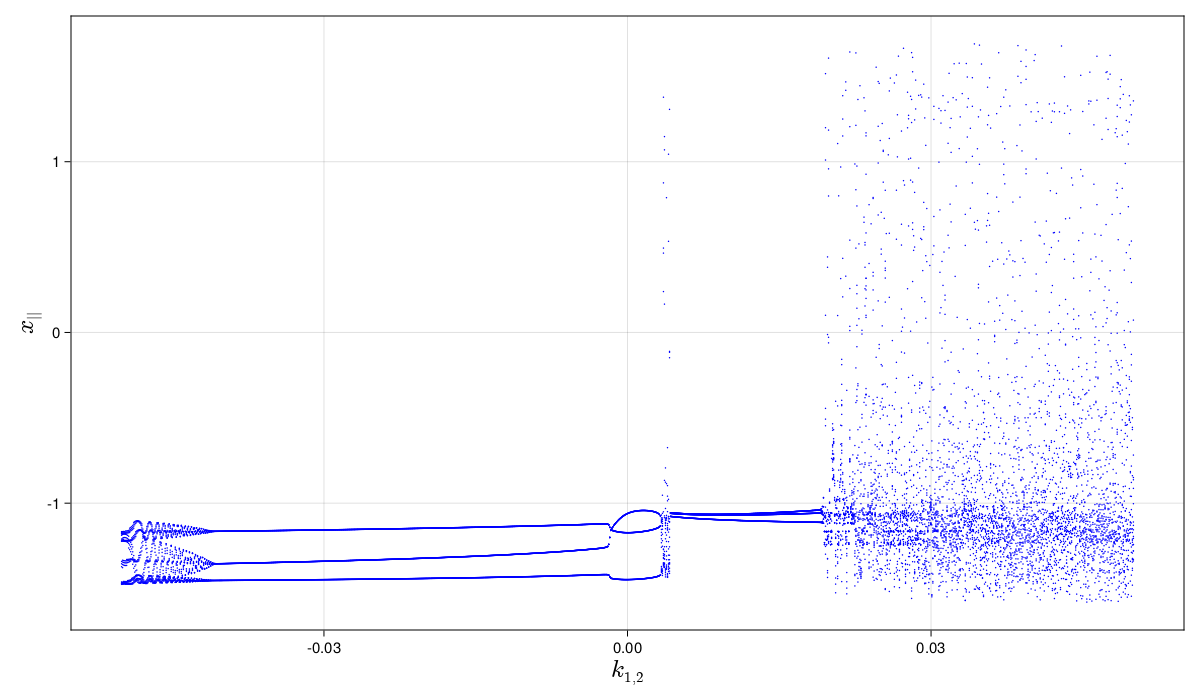

In [29]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

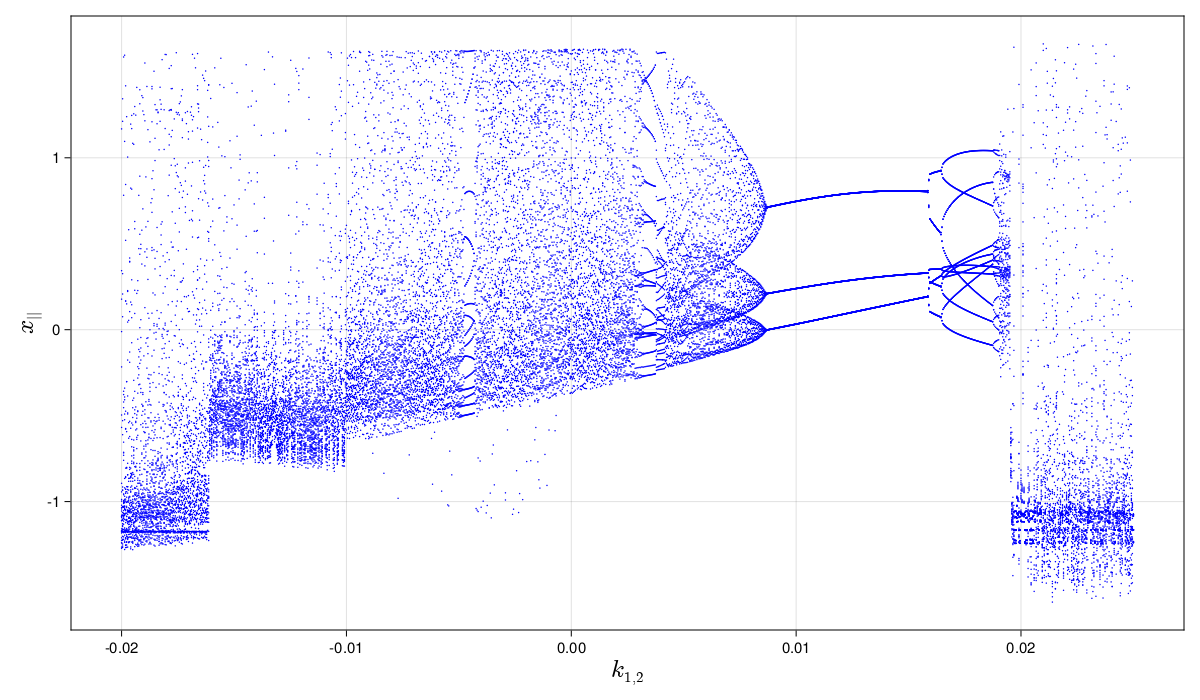

In [22]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

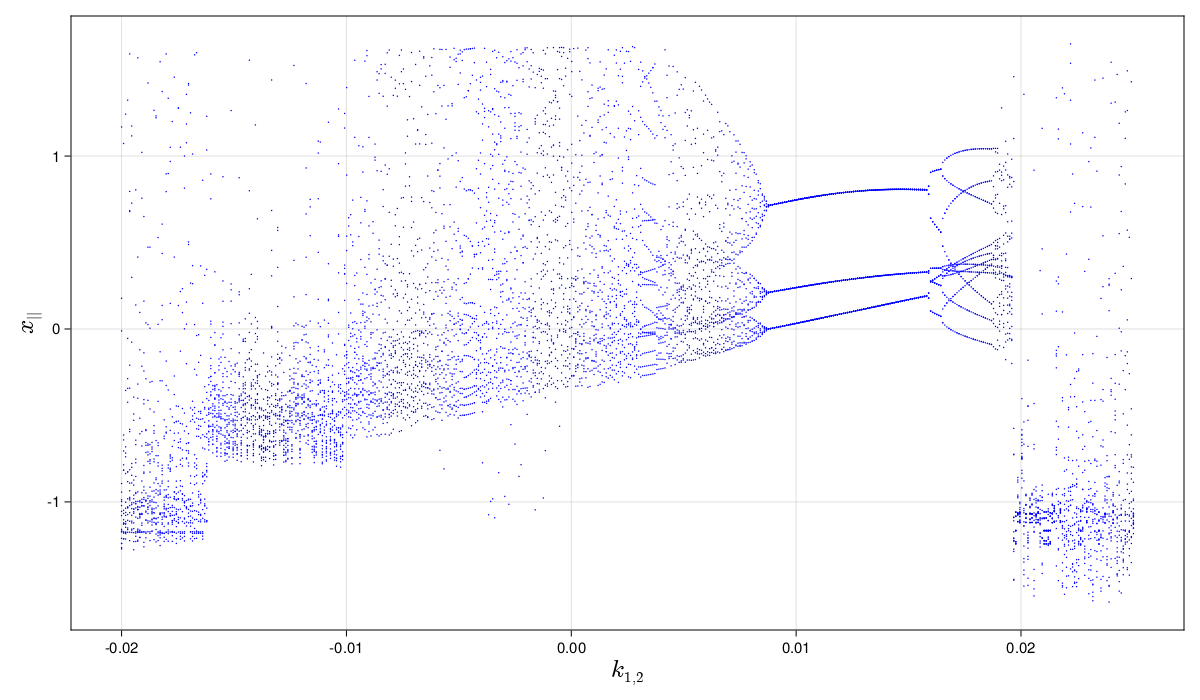

In [14]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

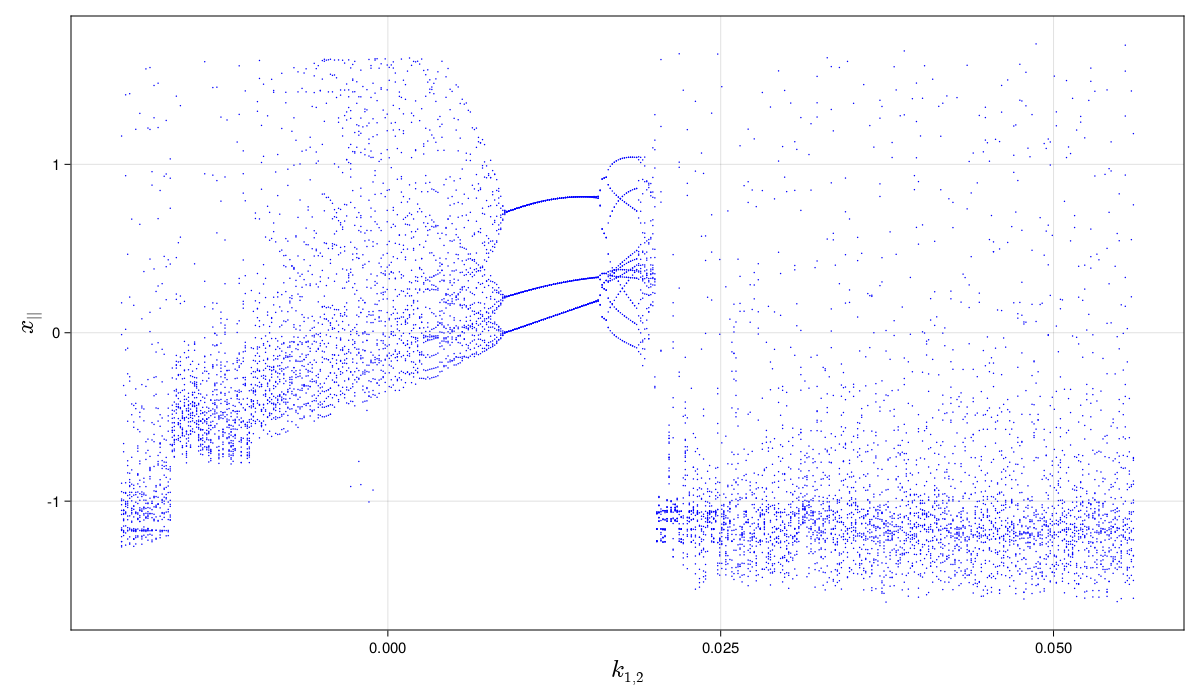

In [123]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig

### range[-0.1; 0.056]

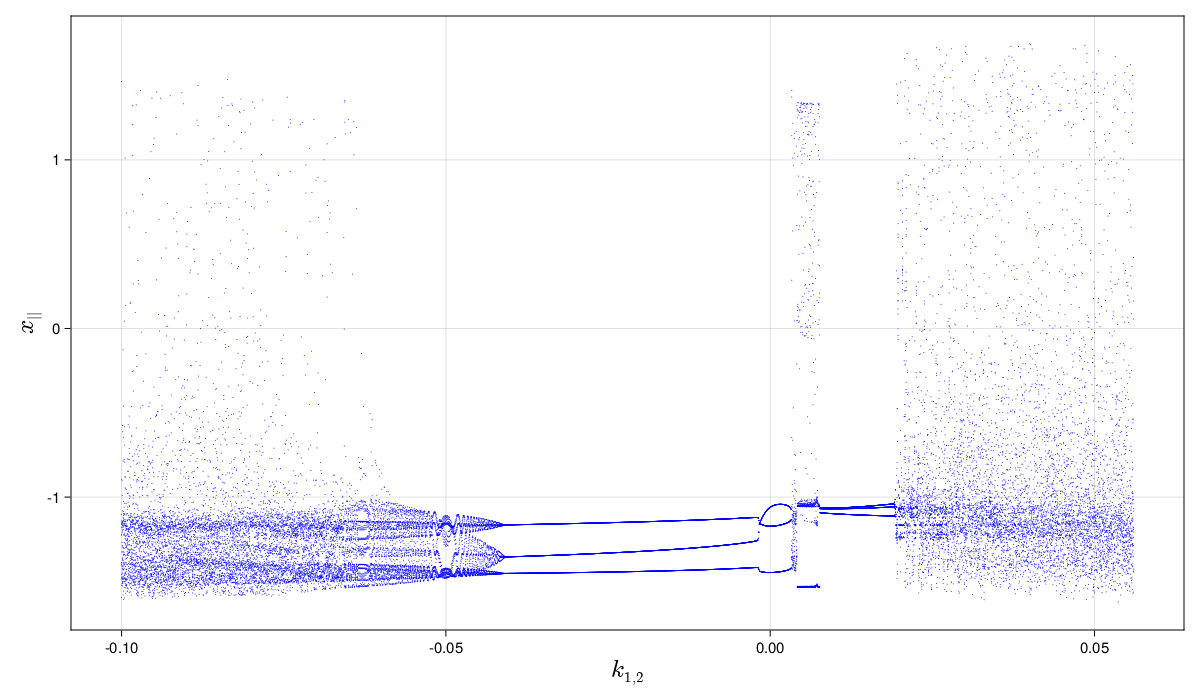

In [99]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
fig

In [ ]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
ylims!(axis, -1.5, -0.8)
fig

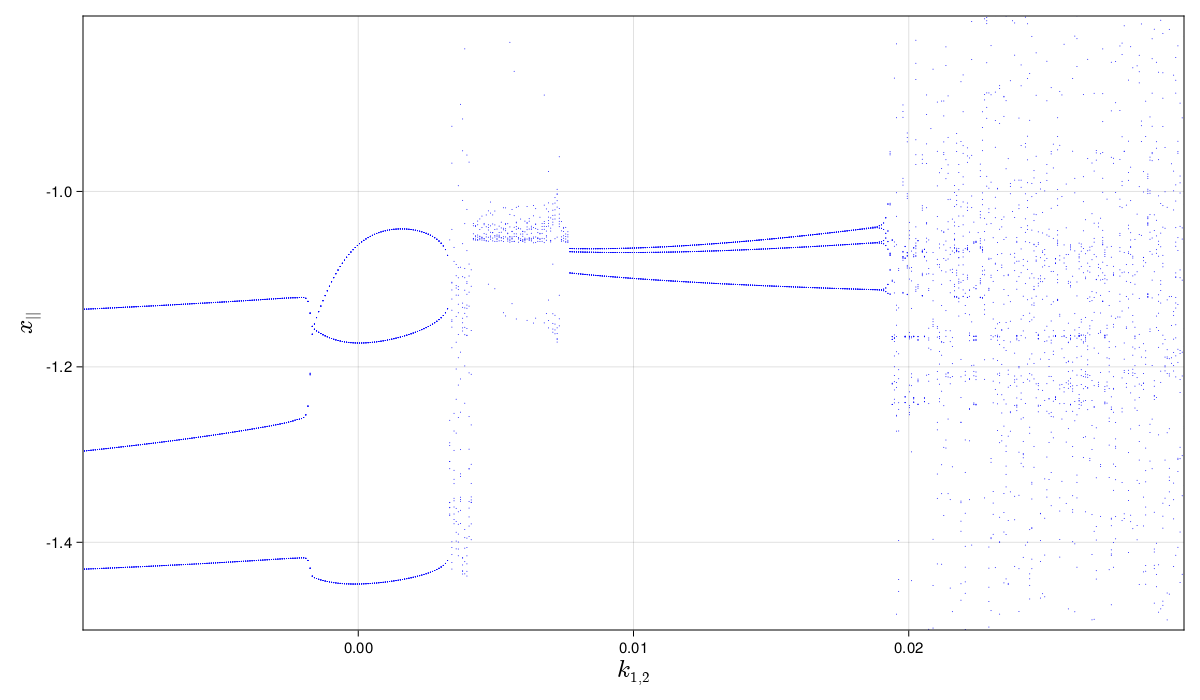

In [106]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.0)
end
ylims!(axis, -1.5, -0.8)
xlims!(axis, -0.01, 0.03)
fig

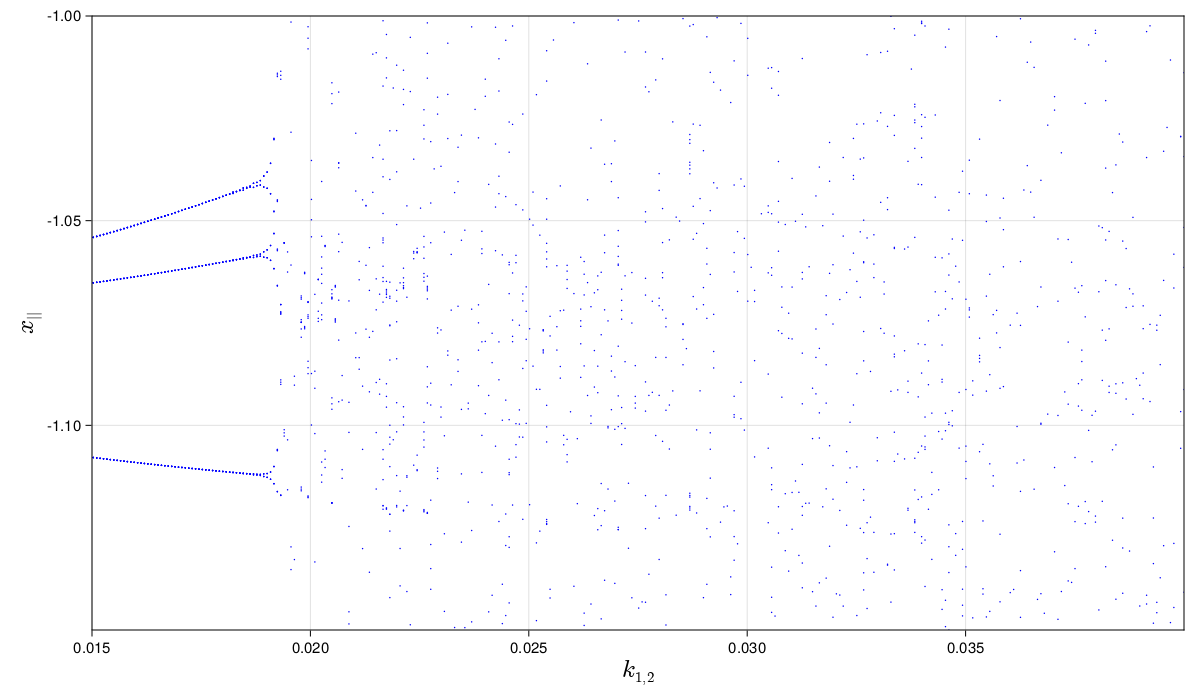

In [105]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
xlims!(axis, 0.015, 0.04)
ylims!(axis, -1.15, -1.)
fig

### range [0.0; 0.056]

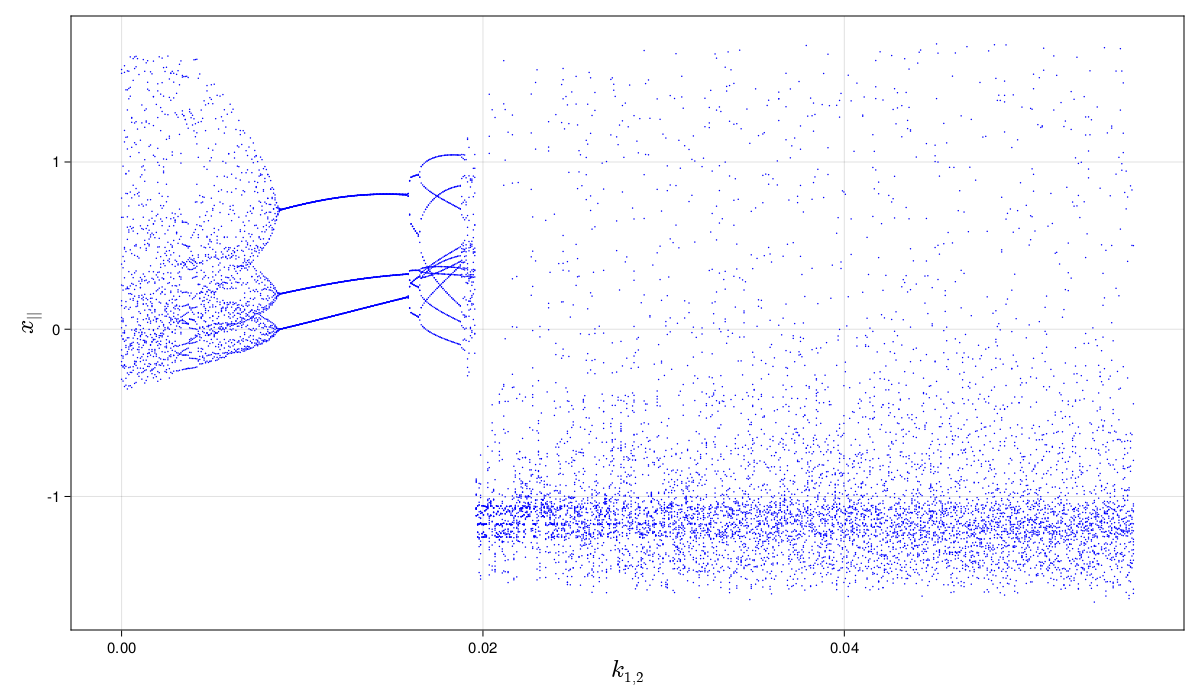

In [40]:
fig = Figure(resolution = (1200, 700))
axis = Axis(fig[1,1];
            xlabel = L"k_{1,2}", ylabel = L"x_{||}",  xlabelsize = lab_size, ylabelsize = lab_size, xticklabelsize = tick_size, yticklabelsize = tick_size)

for (j, p) in enumerate(range_chem)
    scatter!(axis, fill(p, length(x_sum[j])), x_sum[j]; color = ("blue", 1.0), markersize = 1.5)
end
fig